# Project 0 -  Explore Weather Trends

## Exploring Weather Trends - Project Instructions
### Summary
In this project, you will analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.

### Instructions
Your goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where you live. To do this, you’ll follow the steps below:

* Extract the data from the database. There's a workspace in the next section that is connected to a database. You’ll need to export the temperature data for the world as well as for the closest big city to where you live. You can find a list of cities and countries in the city_list table. To interact with the database, you'll need to write a SQL query.
    * Write a SQL query to extract the city level data. Export to CSV.
    * Write a SQL query to extract the global data. Export to CSV.
    
* Open up the CSV in whatever tool you feel most comfortable using. We suggest using Excel or Google sheets, but you are welcome to use another tool, such as Python or R.

* Create a line chart that compares your city’s temperatures with the global temperatures. Make sure to plot the moving average rather than the yearly averages in order to smooth out the lines, making trends more observable (the last concept in the previous lesson goes over how to do this in a spreadsheet).

* Make observations about the similarities and differences between the world averages and your city’s averages, as well as overall trends. Here are some questions to get you started.
    * Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?
    * “How do the changes in your city’s temperatures over time compare to the changes in the global average?”
    * What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

# Getting the data from Udacity

Following SQL commands to get the data in three different .csv files.

```SQL
SELECT *
FROM city_data;
```

```SQL
SELECT *
FROM global_data;
```

```SQL
SELECT *
FROM city_list;
```

## 
Tools used: 

1. Python as a programming language 
2. pandas library to process the data
3. matplotlib and seaborn library to visualize the data

Key considerations for visualizing was to make it easy for the reader to understand!

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

# Importing the data

In [36]:
df_city_data = pd.read_csv('city_data.csv')
df_global_data = pd.read_csv('global_data.csv')
df_city_list = pd.read_csv('city_list.csv')

# Choosing the closest big city and checking for null values

In [37]:
hamburg = df_city_data.query('country == "Germany" & city == "Hamburg"')
hamburg.isna().sum()
df_global_data.isna().sum()

year        0
city        0
country     0
avg_temp    4
dtype: int64

year        0
avg_temp    0
dtype: int64

# Dropping null values

In [38]:
hamburg.dropna(inplace=True)

# Calculating a 7-year average

In [39]:
hamburg['rolling_avg'] = hamburg['avg_temp'].rolling(7).mean()
df_global_data['rolling_avg'] = df_global_data['avg_temp'].rolling(7).mean()

# Plotting the data

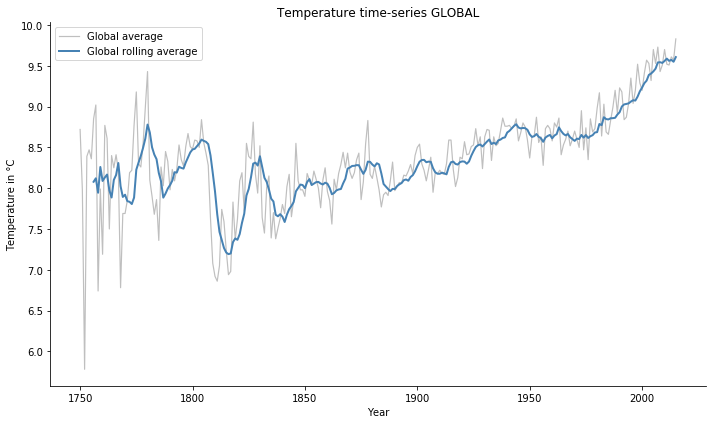

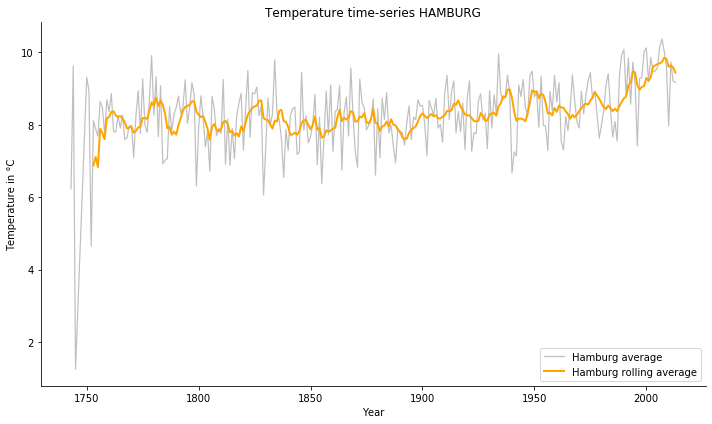

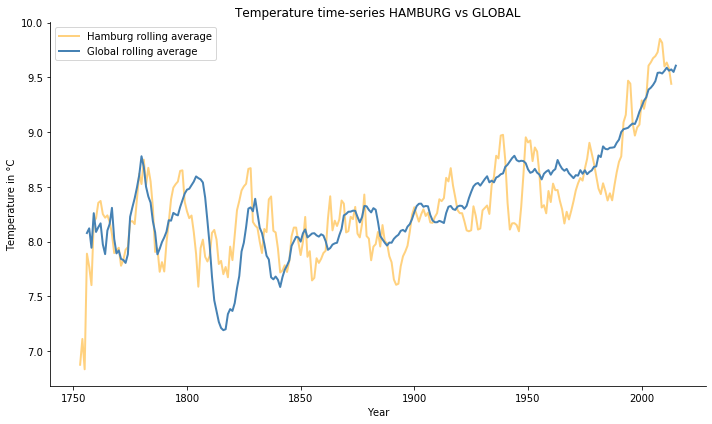

In [67]:
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = "year", y = "avg_temp", data = df_global_data, label = "Global average", alpha = 0.5, color = "grey", lw = 1.2)
sns.lineplot(x = "year", y = "rolling_avg", data = df_global_data, label = "Global rolling average", color = "steelblue", lw = 2)

ax.legend()
ax.set_ylabel("Temperature in °C")
ax.set_xlabel("Year")
ax.set_title("Temperature time-series GLOBAL")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout();
#-----------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = "year", y = "avg_temp", data = hamburg, label = "Hamburg average", alpha = 0.5, color = "grey", lw = 1.2)
sns.lineplot(x = "year", y = "rolling_avg", data = hamburg, label = "Hamburg rolling average", color = "orange", lw = 2)

ax.legend()
ax.set_ylabel("Temperature in °C")
ax.set_xlabel("Year")
ax.set_title("Temperature time-series HAMBURG")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout();
#-----------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = "year", y = "rolling_avg", data = hamburg, label = "Hamburg rolling average", alpha = 0.5, color = "orange", lw = 2)
sns.lineplot(x = "year", y = "rolling_avg", data = df_global_data, label = "Global rolling average", color = "steelblue", lw = 2)

ax.legend()
ax.set_ylabel("Temperature in °C")
ax.set_xlabel("Year")
ax.set_title("Temperature time-series HAMBURG vs GLOBAL")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout();

## Insights:
#1 - Temperature is rising - globally and in Hamburg! The timeseries is almost identical if you compare the rolling average of Hamburg with the global rolling average (although it doesn't look like that in their own respective graphs). The trend has been consistent for the last 100 years.

#2 - After 1850 the temperature rises almost constantly globally. Hamburg has many ups and downs and bigger differences between those values than global (looking at the graph it looks like ~2° for Hamburg and less than 1° globally if we look at the values from 1950 onwards).

#3 On average it looks like Hamburg is more ore less the same as the world in terms of temperature.

#4 Hamburg's temperature is very volatile compared to the rest of the world, having MANY spikes.